## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## Imporiting the Data and Performing basic EDA

In [2]:
data =  pd.read_csv("creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<H6> The V1, V2, V3, ... columns in the Credit Card Fraud Detection dataset represent anonymized features.
<H6> Anonymization means transforming the original features so that they can’t be traced back to specific individuals. Which keeps sensitive user data safe from unauthorized access.


Text(0.5, 1.0, 'Count of fraudulent and non-fraudulent Transcations')

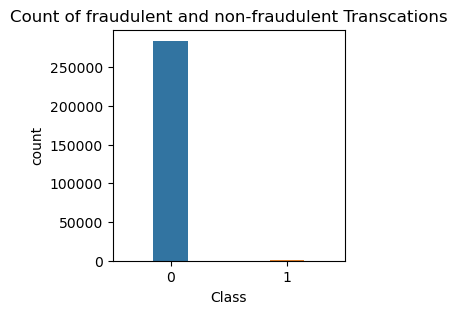

In [7]:
plt.figure(figsize=[3,3])
sns.countplot(x = data['Class'],width= 0.3)
plt.title("Count of fraudulent and non-fraudulent Transcations")



In [8]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<H6>In the above figure 0 is for non-fraudulent transactions and 1 is for fraudulent transactions. 
<H6>There is a significant class imbalance in the dataset, with only 492 fraudulent transactions out of 284,807 total transactions. 
<H6>This imbalance is common in fraud detection datasets, where the majority of transactions are legitimate, and only a small fraction are fraudulent. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


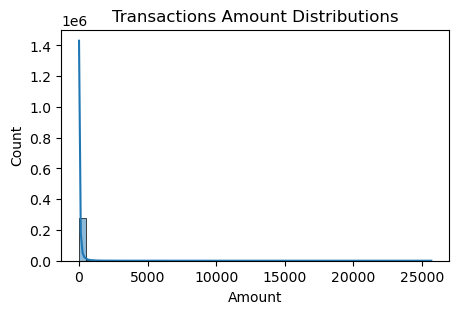

In [9]:
plt.figure(figsize=(5,3))
sns.histplot(data = data["Amount"],bins=50,kde= True)
plt.title("Transactions Amount Distributions")
plt.show()

<H6>The reason you're seeing a very long bar at 0 could be that the Amount variable has a highly skewed distribution with many transactions having a low or zero amount. 
<H6> To solve this problem lets use log transformation 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


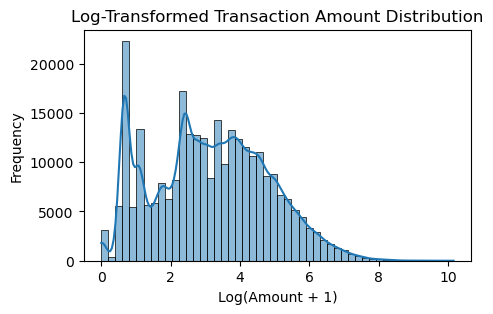

In [10]:
plt.figure(figsize=(5,3))
sns.histplot(np.log1p(data['Amount']), bins=50, kde=True)
plt.title('Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

<H6> The right skew suggests the presence of a few high-value transactions. 
<H6>  Most transactions involve smaller amounts, indicating that low-value purchases are more common in the dataset. This could represent day-to-day transactions or small purchases made by cardholders

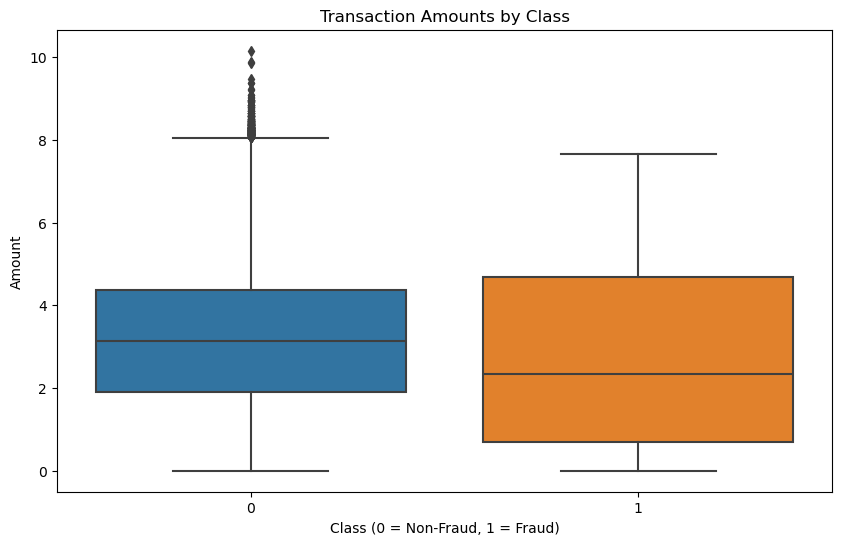

In [11]:
plt.figure(figsize=(10,6))
# Apply log transformation to Amount and add it to the datase
sns.boxplot(x='Class', y=np.log1p(data['Amount']), data=data)
plt.title('Transaction Amounts by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Amount')
plt.show()

<H6>You can conclude that non-fraudulent transactions cover a wide range of amounts, including many very high-value transactions (outliers).
<H6>These high-value transactions are normal for legitimate transactions but might be considered as noise depending on your model's needs.
<H6>The overlap between the two classes (with Class 1 spanning from 1 to 5 and Class 0 primarily being from 2 to 4) implies that there are potentially legitimate transactions within the range that may get flagged as fraudulent, especially if the detection model is not adequately calibrated.

In [12]:
numeric_df = data.select_dtypes(include = [np.number])


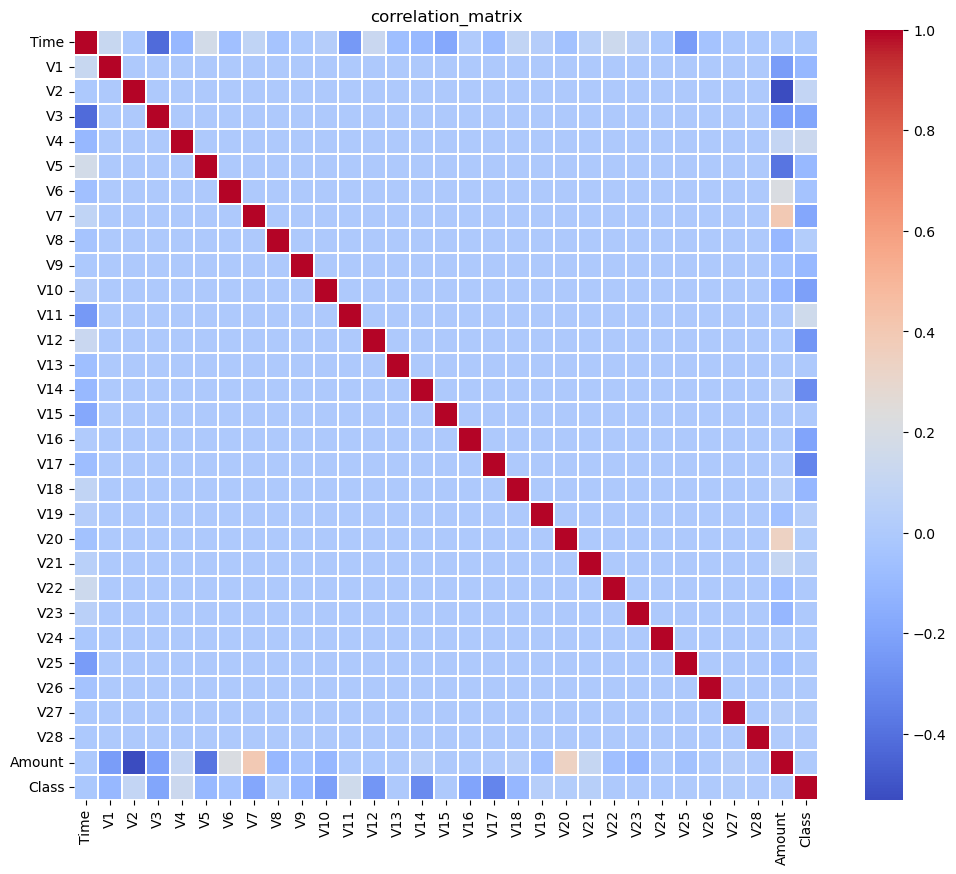

In [13]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data = correlation_matrix,fmt='.2f', cmap='coolwarm',annot_kws={"size": 8},linewidths=.2)
plt.title('correlation_matrix')
plt.show()

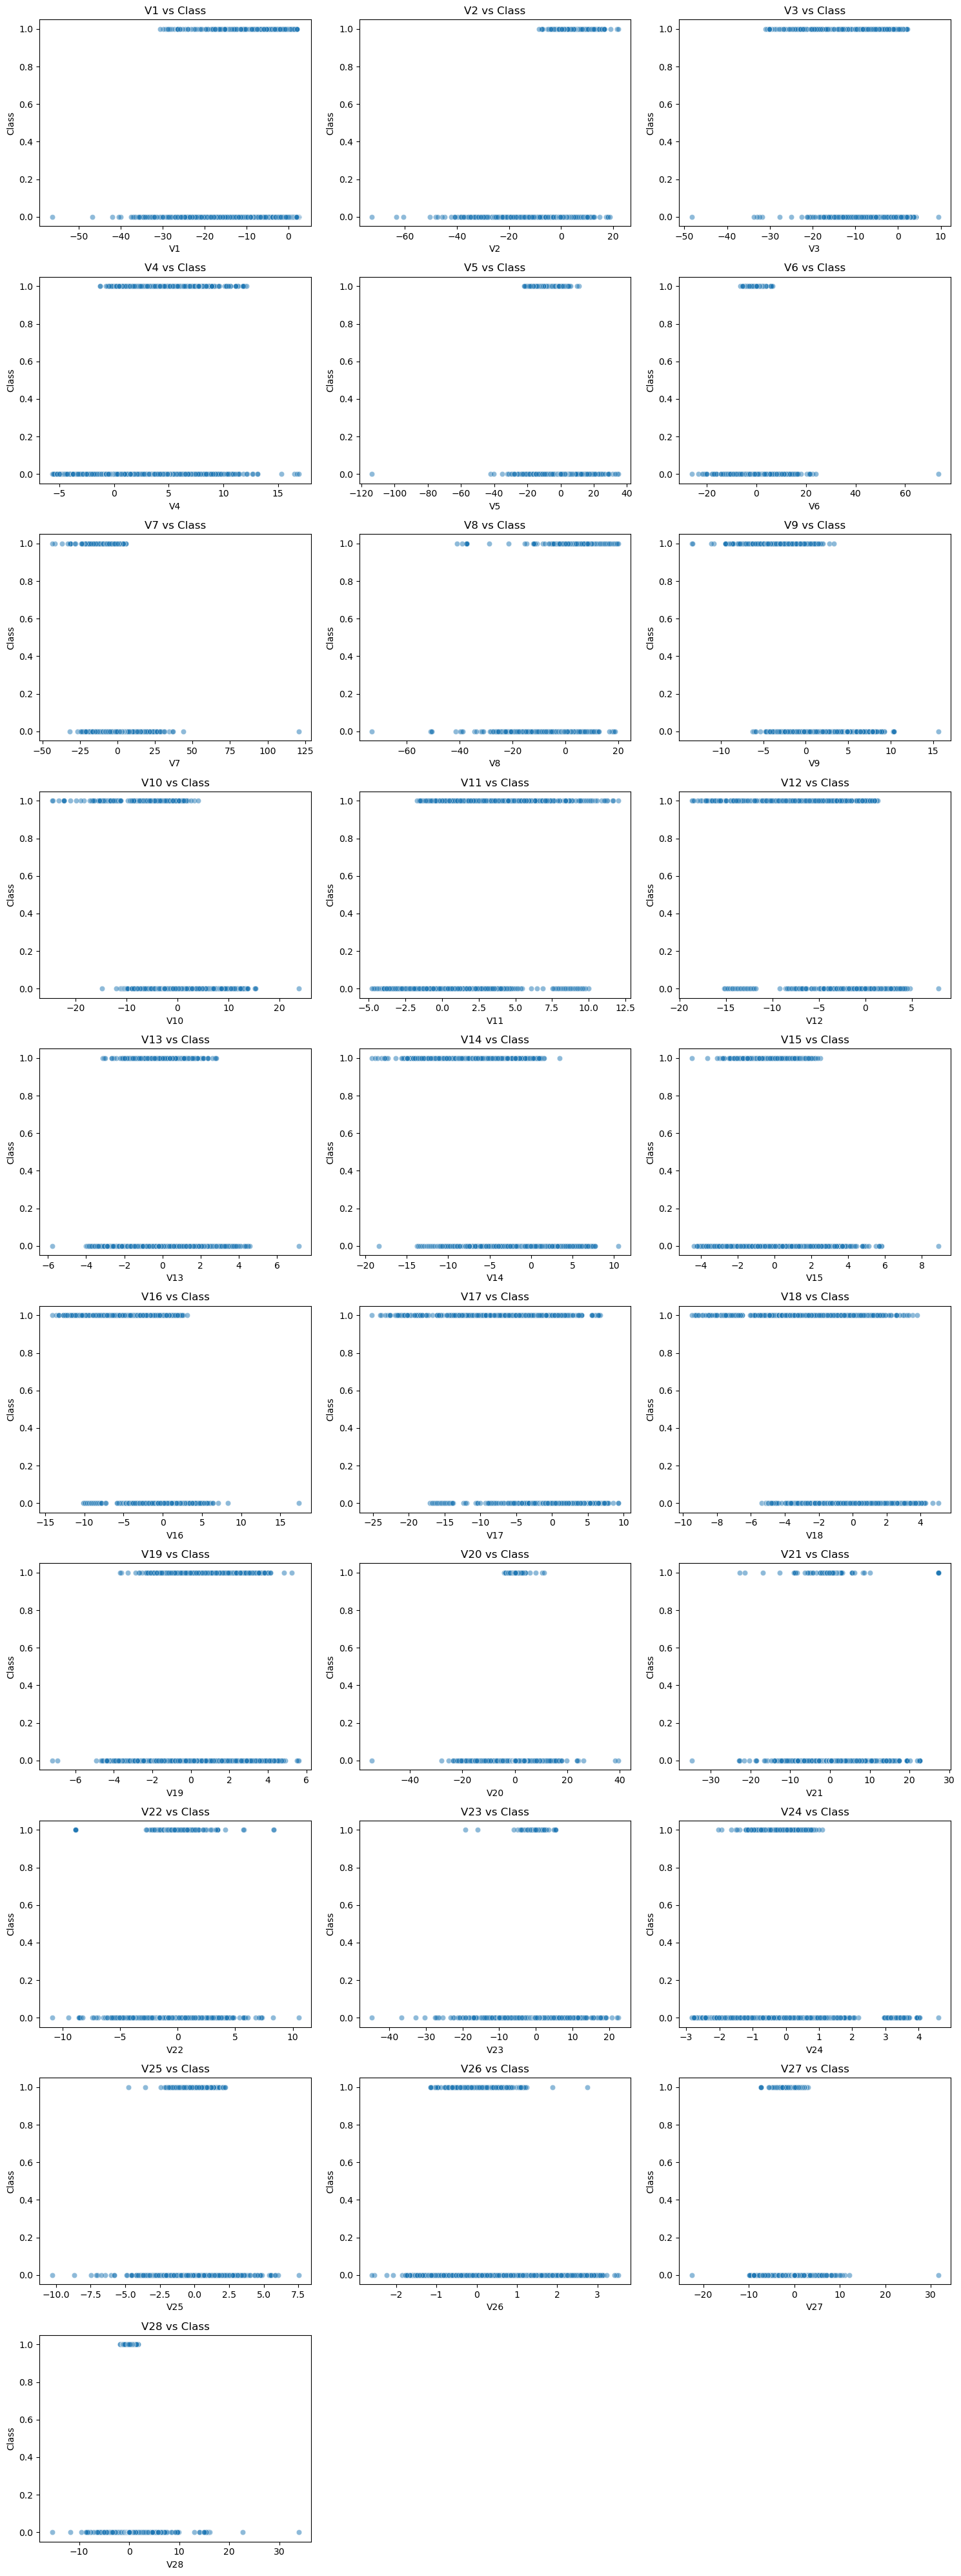

In [14]:
# List of V columns
v_columns = [f'V{i}' for i in range(1, 29)]  # Assuming V1 to V28

# Set the number of columns for the grid
n_cols = 3  # Change to 2 if you want only 2 plots in a row
n_rows = len(v_columns) // n_cols + (len(v_columns) % n_cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))  # Adjust figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through V columns and create scatter plots
for i, v_col in enumerate(v_columns):
    sns.scatterplot(x=data[v_col], y=data['Class'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{v_col} vs Class')
    axes[i].set_xlabel(v_col)
    axes[i].set_ylabel('Class')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


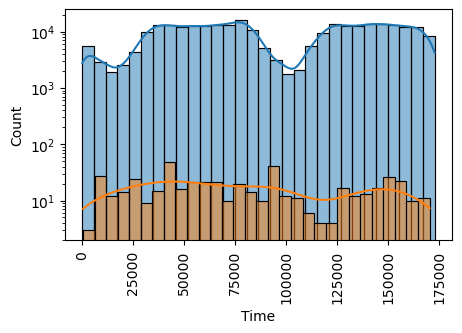

In [15]:
plt.figure(figsize=(5,3))
sns.histplot(data[data['Class']== 0]['Time'],bins=30,label = 'Non Fraud',kde=True)
sns.histplot(data[data['Class']== 1]['Time'],bins=30,label = 'Fraud',kde=True)
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.show()

<H6> Although fraudulent transactions are much fewer in number, they are spread throughout the entire time range of the dataset, indicating that fraudulent activity can occur at any point and is not limited to a specific time window.
<H6> The non-fraud transactions exhibit several distinct peaks over time, suggesting a cyclical pattern in transaction activity. This could potentially indicate specific times when transaction volumes spike, such as during certain hours of the day or promotional events.

<H2> Data Preparation for Modeling

In [90]:
X=data.drop('Class',axis = 1).fillna(0)
y= data['Class']

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
print(f'Traing set size : {X_train.shape[0]}')
print(f'Test set size : {X_test.shape[0]}')

Traing set size : 227845
Test set size : 56962


<H2> Logistic Regression

In [93]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
y_pred = model.predict(X_test)

In [95]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.57      0.60        98

    accuracy                           1.00     56962
   macro avg       0.81      0.79      0.80     56962
weighted avg       1.00      1.00      1.00     56962

[[56830    34]
 [   42    56]]


<H6>The model performs excellently in predicting non-fraud cases (Class 0) but struggles with identifying fraud cases (Class 1).
<H6> This might be primarily due to the significant class imbalance in your dataset.

<H2>Fixing the data imbalance 

In [99]:
from sklearn.utils import resample
X = data.drop('Class', axis=1)
y = data['Class']

# Combine the features and target into a new DataFrame
data = pd.concat([X, y], axis=1)

# Separate majority and minority classes
df_majority = data[data['Class'] == 0]
df_minority = data[data['Class'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                     replace=False,     # sample without replacement
                                     n_samples=len(df_minority),    # to match minority class
                                     random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separate features and target
X_balanced = df_balanced.drop('Class', axis=1)
y_balanced = df_balanced['Class']

# Now you can proceed to split and train your model
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

[[95  4]
 [10 88]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<H2>Decision Tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train,y_train)

y_pred_dt =dt_model.predict(X_test)

print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        99
           1       0.91      0.88      0.90        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

[[91  8]
 [12 86]]


<h2>Gradient Boosting Classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

[[95  4]
 [11 87]]


<h2>XGBoost Classifier

In [104]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

[[95  4]
 [ 9 89]]


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:18:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<H6> After comparing the performance of XGBoost, Logistic Regression, Decision Tree, and Gradient Boosting classifiers on the dataset, the following insights were observed:

XGBoost performed the best overall, achieving the highest accuracy, precision, recall, and F1-score for fraud detection (Class 1). Its ability to handle imbalanced data and optimize using gradient boosting techniques made it the most effective model for this task.

Logistic Regression came in second, offering a reliable balance of precision and recall, particularly for non-fraudulent cases (Class 0). However, it struggled slightly in identifying fraud cases due to the imbalance in the dataset.